<a href="https://colab.research.google.com/github/robb2828/fournier-coding/blob/certificate_work/assignment1_RF_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





# Question 1

In [1]:
# Importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data saved to the local machine into a Pandas DataFrame
mosq_df = pd.read_csv("mosquitos_data.csv")
mosq_df.head()

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


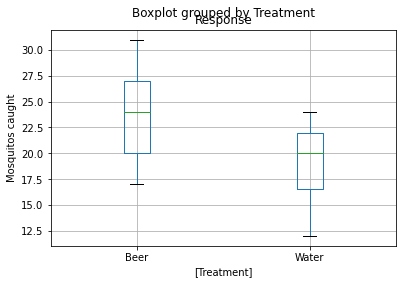

In [76]:
# Question 1

# Run a boxplot method off the Pandas dataframe
mosq_df.boxplot(by="Treatment")
plt.ylabel("Mosquitos caught")
plt.show()

Based on the boxplot above, there is an positive association between the treatment of beer and the response variable. The control variable of water allows us to identify beer as the explanatory variable in the treatment group that does hold a positive correlation to the response of mosquitos. Therefore, it can be summarized that, according to this data, there is a positive association between beer and attractiveness to mosquitos. 

In [4]:
mosq_df.groupby("Treatment").agg(["mean", "median", "std", "var", "count"])

Response                                  
                mean median       std        var count
Treatment                                             
Beer       23.600000     24  4.133199  17.083333    25
Water      19.222222     20  3.671120  13.477124    18

The basic statistic measures calculated include:

*   **Mean**: this is the average, or the ∑x for x in the dataset divided by n values in the dataset. In other words, the sum of all values divided by the count of values.
* **Median**: this is middle value of the dataset, or the ith value where i = n/2. The median provides another method of determining centrality of the dataset and can be used to augment the mean statistic. 
* **Standard Deviation (std)**: the standard deviation is a statistic representing the extent of deviation from the mean by the whole population or sample. It is the square root of variance. 
* **Variance**: variance is the measure of how far spread out values are from the mean. It is the sum of differences of values from the mean value divided by n-1 where n is the number of samples.
* **Count**: this is pretty straight forward, but allows us to get a view of the number of samples in both treatment groups.

In this particular case with the mosquito dataset, we can see the following basic statistics:

* **Mean**: 23.6 for beer treatment group and 19.2 for water treatment group. There is a difference of 4.4 between the two treatment groups. 
* **Median**: 24 for beer treatment group and 20 for water treatment group. As the median is very similar to the mean, we can estimate that the dataset is not very skewed and does not contain many outliers for both treatment groups. There is also a difference of 4 between the medians for both groups.
* **Standard Deviation**: the std for beer treatment group is 4.13 and 3.67 for the water treatment group. In this case, both are very similar levels of standard deviation, meaning that on average samples vary by about 4 mosquitos and there's not a significant change in variation for either group.
* **Variance**: the variance is 17.08 for beer treatment group and 13.47 for the water treatment group. As the standard deviation is a less prone to outlier version of variance, we can assume this difference is mostly negiglible. 
* **Count**: 25 for beer treatment group and 18 for water treatment group.



# Question 2

In [62]:
# We'll initiate an empty list to hold the difference in mean between samples
plot_points = []

# And the first value will be the mean between beer and water groups
plot_points.append(float(mosq_df[mosq_df['Treatment'] == 'Beer'].mean() - mosq_df[mosq_df['Treatment'] == 'Water'].mean()))

In [63]:
# Next we create a for loop to iterate though the runs we'd like to do
# Each loop will create a copy of the mosquito df and then sample 18 values and 25 values
# and log the mean between the samples into the list we created
for i in range(5000):
  # Next copy the dataframe
  copy_df = mosq_df.copy()
  # Then sample 18 values
  fake_water_group = copy_df.sample(n=18)
  # Remove those 18 values so there's 25 remaining
  copy_df.drop(fake_water_group.index,inplace=True)
  # And log the difference in mean between the remaining 25 (the fake beer group)
  # and the 18 we sampled out (the fake water group)
  plot_points.append(float(copy_df.mean() - fake_water_group.mean()))

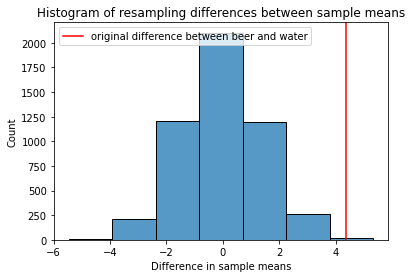

In [75]:
# Now we'll visualize the distribution by plotting the list
sns.histplot(plot_points, bins=7)
# And create a red line where the original beer and water difference is located
plt.axvline(x=plot_points[0],c='red',label="original difference between beer and water")
plt.title("Histogram of resampling differences between sample means")
plt.xlabel("Difference in sample means")
plt.legend()
plt.show()

In [70]:
# The percentage of differences greater than or equal to the beer and water group
greater_than_og = [x for x in plot_points if x >= plot_points[0]]
print(f"Out of {len(plot_points)} resampling, only {len(greater_than_og)} were greater than the original dataset.")
print(f"That's {len(greater_than_og) / len(plot_points):.02%}")

Out of 5001 resampling, only 6 were greater than the original dataset.
That's 0.12%


Based on the above simulation of resampling, there is a 0.12% probability to randomly witness the difference in means demonstrated in the original experiment between beer and water groups.